In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-dark")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#plt.figure(figsize=(20, 15))
#sns.heatmap(train.corr('pearson').abs(), annot=True)
#plt.show()

In [5]:
corr = train.corr().abs()
#corr = pd.DataFrame(corr)
type(corr)

pandas.core.frame.DataFrame

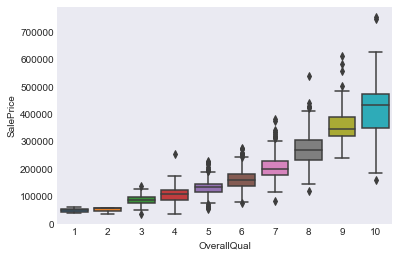

In [6]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.show()
# OverallQual = material general y calidad de acabado

In [7]:
corr_SP = corr.loc[:,['SalePrice']]

In [8]:
corr_SP.sort_values(ascending=False, by='SalePrice')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [9]:
train_select = train.loc[:,["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF", "1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]]

In [10]:
#sns.heatmap(train_select.corr('pearson').abs(), annot=True)
#plt.show()

In [11]:
train_seleccionados = train_select.loc[:,["SalePrice",
                                          "OverallQual",
                                          "GrLivArea",
                                          "GarageCars",
                                          "TotalBsmtSF",
                                          "YearBuilt",
                                          "YearRemodAdd"]]

In [12]:
#g = sns.pairplot(train_seleccionados, kind='reg', diag_kind='kde')
#g.map_upper(sns.kdeplot, levels=3, color=".2")
#plt.show()

In [13]:
X = train.loc[:,["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt", "YearRemodAdd"]]
y = train.loc[:,['SalePrice']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
lm.intercept_

array([-1099624.78138855])

In [18]:
lm.coef_

array([[19436.90877887,    43.67490507, 16735.52372284,    23.40676256,
          219.67814787,   306.03756758]])

In [19]:
y_pred = lm.predict(X_test)

In [20]:
DTpredicciones = pd.DataFrame(y_pred)

In [21]:
DTpredicciones.reset_index(drop=True, inplace=True)

In [22]:
y_test.reset_index(drop=True, inplace=True)

In [23]:
df_unido = y_test.join(DTpredicciones)

In [24]:
df_unido

,SalePrice,0
0,154500,149386.207296
1,325000,286684.405177
2,115000,119615.676742
3,159000,171129.761054
4,315500,289603.748817
...,...,...
477,135000,111365.248440
478,119000,108313.841750
479,215000,225432.551723
480,133500,108965.237919


In [25]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 24582.305134592683
MSE 1537855915.4515355
RMSE 39215.50605884789


In [26]:
test = pd.read_csv("test.csv")

In [27]:
X=test.loc[:, ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","YearBuilt","YearRemodAdd"]]

In [28]:
# borrar valores nulos
X.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [29]:
X['GarageCars'].fillna(0, inplace=True)
X['TotalBsmtSF'].fillna(X['TotalBsmtSF'].mean(), inplace=True)
X.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [30]:
y_pred = lm.predict(X_test)

In [31]:
y_pred

array([[149386.20729578],
       [286684.4051772 ],
       [119615.67674151],
       [171129.7610544 ],
       [289603.74881716],
       [ 57095.69519179],
       [213791.27781953],
       [173936.84765413],
       [ 56044.2637609 ],
       [122008.57093782],
       [158142.88700657],
       [107299.12410803],
       [ 90713.99987816],
       [225987.95934804],
       [197337.58779762],
       [124856.39054617],
       [218221.43853571],
       [130719.83887532],
       [120174.14333154],
       [221518.41614482],
       [178305.20307083],
       [232398.18561268],
       [186266.07885348],
       [118849.31951488],
       [216804.20906325],
       [178650.05910139],
       [214905.50303242],
       [ 95223.82283869],
       [192357.24990763],
       [215490.80489612],
       [125975.50261074],
       [252673.57164873],
       [207477.11162922],
       [ 87020.06444457],
       [270104.10552412],
       [142968.35028536],
       [160666.52193815],
       [227249.9879811 ],
       [2952

In [32]:
y_pred.shape

(482, 1)

In [33]:
DTpredicciones = pd.DataFrame(y_pred)
DTpredicciones.reset_index(drop=True, inplace=True)
id = test.loc[:,['Id']]
id.reset_index(drop=True, inplace=True)
df_competicion = id.join(DTpredicciones)
df_competicion.columns = ['Id', 'SalePrice']

In [34]:
df_competicion

,Id,SalePrice
0,1461,149386.207296
1,1462,286684.405177
2,1463,119615.676742
3,1464,171129.761054
4,1465,289603.748817
...,...,...
1454,2915,NaN
1455,2916,NaN
1456,2917,NaN
1457,2918,NaN


In [35]:
df_competicion.isna().sum()

Id             0
SalePrice    977
dtype: int64

In [38]:
df_competicion['SalePrice'].fillna(df_competicion['SalePrice'].mean(), inplace=True)
df_competicion.isna().sum()

Id           0
SalePrice    0
dtype: int64

In [39]:
df_competicion.to_csv('concurso.csv', index=False)